<a href="https://colab.research.google.com/github/eliu0120/Stats-101C-Final-Project/blob/angelique/101c_LDA_QDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [6]:
# Import data
raw_data = pd.read_csv("IMDB Dataset.csv")

# Transform all reviews to lower case only
raw_data["review"] = raw_data["review"].apply(lambda x: x.lower())

# Get all positive words
positive_words_file = open("positive-words.txt", "r")
positive_words = positive_words_file.read().split("\n")
positive_words = list(map(str.lower, positive_words[35:-1]))
positive_words = set(positive_words)

# Get all negative words
negative_words_file = open("negative-words.txt", "r")
negative_words = negative_words_file.read().split("\n")
negative_words = list(map(str.lower, negative_words[35:-1]))
negative_words = set(negative_words)

# Combine all positive and negative words into one set
sentiment_words = positive_words.union(negative_words)

In [7]:
# Create TF-IDF matrix based on sentiment words
vectorizer = TfidfVectorizer(vocabulary = sentiment_words)

tf_idf_matrix = vectorizer.fit_transform(raw_data["review"])
tf_idf_matrix = tf_idf_matrix.toarray()
tf_idf_matrix.shape

(50000, 6786)

In [8]:
# Choosing 1300 components as that captures roughly 0.80 cumulative variance ratio
pca2 = PCA(n_components = 1300)
""
transformed_features = pca2.fit_transform(tf_idf_matrix)

In [10]:
# Splitting data + converting sentiment to binary
sentiment = (raw_data['sentiment'] == 'positive').astype(int)

X_train, X_test, y_train, y_test = train_test_split(transformed_features, sentiment, train_size = 0.5, random_state = 1, shuffle = True)

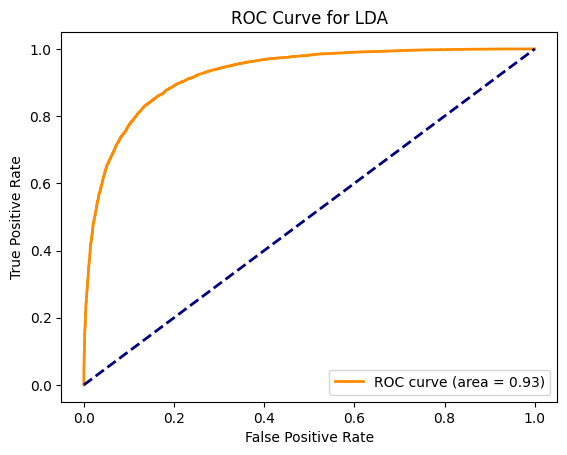

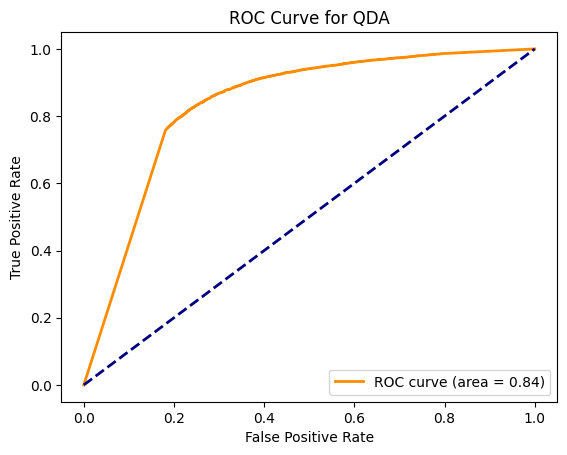

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already loaded the data and created the 'sentiment' variable

# Splitting data and converting sentiment to binary
X_train, X_test, y_train, y_test = train_test_split(transformed_features, sentiment, train_size=0.5, random_state=1, shuffle=True)

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
pred_lda_test = lda_model.predict_proba(X_test)[:, 1]

# ROC curve for LDA
fpr_lda, tpr_lda, _ = roc_curve(y_test, pred_lda_test)
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure()
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA')
plt.legend(loc="lower right")
plt.show()

# QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
pred_qda_test = qda_model.predict_proba(X_test)[:, 1]

# ROC curve for QDA
fpr_qda, tpr_qda, _ = roc_curve(y_test, pred_qda_test)
roc_auc_qda = auc(fpr_qda, tpr_qda)

plt.figure()
plt.plot(fpr_qda, tpr_qda, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_qda))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for QDA')
plt.legend(loc="lower right")
plt.show()
